<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Connor_Heraty_LS_DS3_123_Reshape_data_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [2]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [3]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [4]:
table1.columns

Index(['treatmenta', 'treatmentb'], dtype='object')

In [5]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [6]:
tidy = table1.reset_index().melt(id_vars='index')  

tidy = tidy.rename(columns={
    'index':'name',
    'variable':'trt',
    'value': 'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [7]:
tidy['trt'].replace(['a','b'],[0,1])

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [8]:
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [9]:
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [10]:
# Original Form
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [11]:
# Tidy Form
tidy2 = table2.reset_index().melt(id_vars='index')

tidy2 = tidy2.rename(columns={
    'index':'trt',
    'variable':'name',
    'value': 'result'
})

tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')

tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [12]:
tidy.pivot_table(index='name', columns = 'trt', values = 'result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [13]:
# Use pivot_table to revert tidied table to original form
tidy2.pivot_table(index='trt',columns='name',values='result')

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


# Seaborn Example

In [14]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


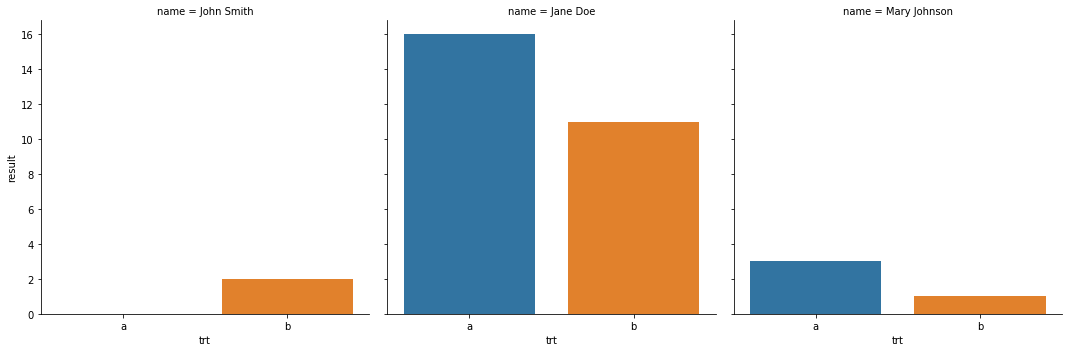

In [15]:
sns.catplot(x='trt', y='result', col='name',
           kind='bar', data=tidy, height=5);

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [2]:
 !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 22:40:48--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.108.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.108.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.5’

instacart_online_gr 100%[===================>] 196.03M  98.7MB/s    in 2.0s    

2019-03-27 22:40:50 (98.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.5’ saved [205548478/205548478]



In [3]:
 !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

department = pd.read_csv('departments.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [6]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [8]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [9]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [10]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id','product_id']])
          .merge(orders[['order_id','order_hour_of_day']]))

In [12]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [13]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
# What condition will filter 'merged' to just the 2 products that we care about

condition = ((merged['product_name']=='Half Baked Frozen Yogurt') |
             (merged['product_name']=='Half and Half Ultra Pasteurized'))

# ... to this:

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

In [15]:
merged.shape, subset.shape

((33819106, 4), (5978, 4))

In [16]:
subset.sample(5)

,product_id,product_name,order_id,order_hour_of_day
14434711,30668,Half Baked Frozen Yogurt,2876545,14
5006824,9292,Half And Half Ultra Pasteurized,180130,8
29197925,9292,Half And Half Ultra Pasteurized,2072895,10
700959,9292,Half And Half Ultra Pasteurized,1814776,13
6239817,30668,Half Baked Frozen Yogurt,74481,16


## 4 ways to reshape and plot

### 1. value_counts

In [17]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']
cream

,product_id,product_name,order_id,order_hour_of_day
45167,9292,Half And Half Ultra Pasteurized,802884,8
74055,9292,Half And Half Ultra Pasteurized,3230936,14
163486,9292,Half And Half Ultra Pasteurized,1599440,11
191375,9292,Half And Half Ultra Pasteurized,212295,8
200888,9292,Half And Half Ultra Pasteurized,507671,14
206291,9292,Half And Half Ultra Pasteurized,675670,19
208991,9292,Half And Half Ultra Pasteurized,770276,13
223939,9292,Half And Half Ultra Pasteurized,1251727,13
230893,9292,Half And Half Ultra Pasteurized,1475099,18
238012,9292,Half And Half Ultra Pasteurized,1686226,9


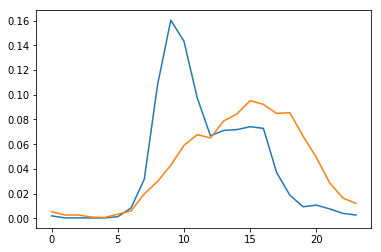

In [18]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());
 
(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

In [19]:
pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns')

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.002003,0.005364
1,0.000334,0.002682
2,0.000334,0.002682
3,0.000000,0.001006
4,0.000334,0.000670
5,0.001336,0.003352
6,0.008347,0.006034
7,0.031720,0.019779
8,0.107846,0.029836


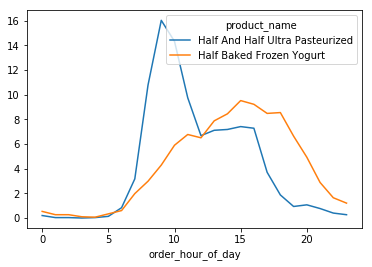

In [20]:
(pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns') * 100).plot();

### 3. pivot_table

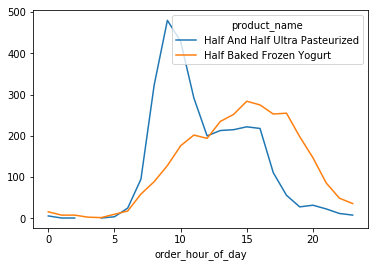

In [21]:
subset.pivot_table(index='order_hour_of_day',
                  columns='product_name',
                  values='order_id',
                  aggfunc=len).plot();

### 4. melt

In [22]:
table = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize=True)

melted = (table.reset_index().melt(id_vars='order_hour_of_day'))
melted

,order_hour_of_day,product_name,value
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [24]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [25]:
# Pivot table showing number of passengers by month and year
flights.pivot_table(index ='year', columns = 'month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
flight_pivot = flights.pivot_table(index ='year', columns = 'month', values='passengers' )

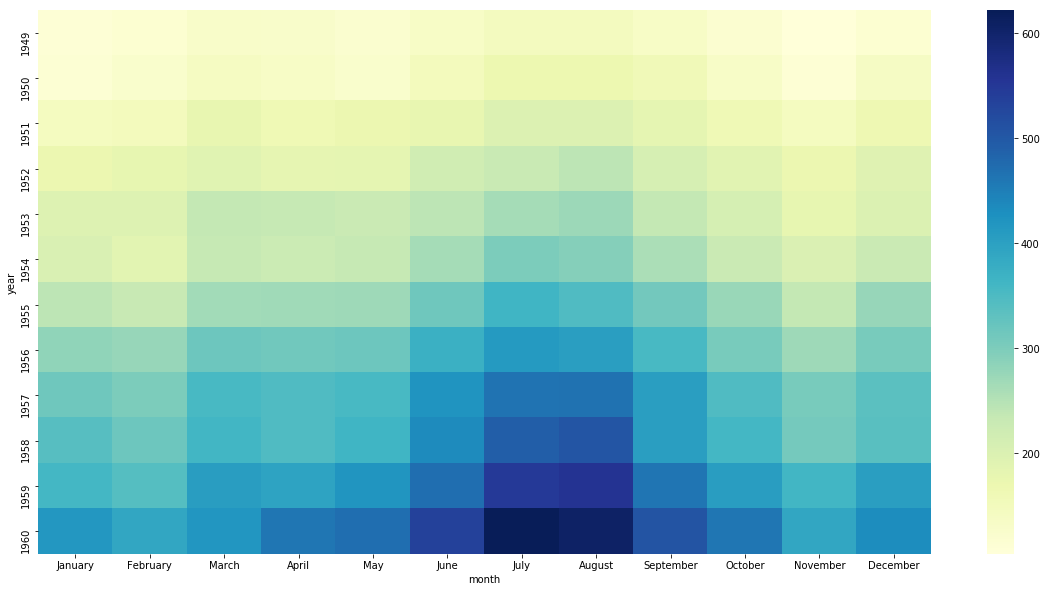

In [27]:
# Classic heatmap use case!
# We can see the increase in flights during the summer months and the increase in flights year over year

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(data=flight_pivot, cmap="YlGnBu");

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Stretch Goal

For my first stretch goal, I will attempt to reproduce the other visualization on the Instacart blog post.

![alt text](https://cdn-images-1.medium.com/max/1200/1*jwDcKJTXV8D1DK0KOlUJAQ.png)

To obtain the data for 'Percent Reorder Purchases' and 'Number of Purchases' we will need the following features:
- **product_name**
- **reordered**

The data is plotted by department, so we will also need to grab the **department** feature.

In [28]:
# Checking the headers of all csv_files for the features noted above
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [29]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [30]:
department.columns.tolist()

['department_id', 'department']

Now that we have the dataframes we need, lets create a new dataframe by merging on the features they share in common.

In [0]:
merged = (products[['product_id', 'product_name','department_id']]
          .merge(order_products[['product_id','reordered']])
         .merge(department[['department_id','department']]))

In [32]:
# Check - Everything looks good!
merged.head()

,product_id,product_name,department_id,reordered,department
0,1,Chocolate Sandwich Cookies,19,0,snacks
1,1,Chocolate Sandwich Cookies,19,1,snacks
2,1,Chocolate Sandwich Cookies,19,1,snacks
3,1,Chocolate Sandwich Cookies,19,0,snacks
4,1,Chocolate Sandwich Cookies,19,0,snacks


We will use the groupby function to aggregate the mean and total count of the reorder column for each department in our database.

In [0]:
reordered = (merged
            .groupby('department')
            .reordered.agg(['mean','count'])
            .rename(columns={'mean':'Percent Reorder Purchases', 'count':'Number of Purchases'})
            .reset_index())

In [34]:
# Check - it looks good!
reordered.head()

,department,Percent Reorder Purchases,Number of Purchases
0,alcohol,0.571221,159294
1,babies,0.577680,438743
2,bakery,0.628381,1225181
3,beverages,0.653651,2804175
4,breakfast,0.561351,739069


# Final Plot

The plot from the website (pictured above) is not ideal for two reasons:
- The text-markers make it difficult to see the departments that are aggregated on the left.
- The log scale can be misleading for the not-so mathematically minded people that may find this information useful.

I have replaced the text-markers with circles that are color coordinated and which reveal the associated department when the cursor is hovered over the marker. Now each department marker is easier to discern for the plots end user. With the logarithm scale taken out, it is visibly apparent how much produce is purchased over all other departments. 

In [35]:
import altair as alt

alt.Chart(reordered,height=400,width=700).mark_circle(size=100).encode(
    x='Number of Purchases',
    y='Percent Reorder Purchases',
    tooltip='department',
    color='department',
    
    
).interactive()

Chart({
  data:          department  Percent Reorder Purchases  Number of Purchases
  0           alcohol                   0.571221               159294
  1            babies                   0.577680               438743
  2            bakery                   0.628381              1225181
  3         beverages                   0.653651              2804175
  4         breakfast                   0.561351               739069
  5              bulk                   0.577090                35932
  6      canned goods                   0.458639              1114857
  7        dairy eggs                   0.670161              5631067
  8              deli                   0.608130              1095540
  9   dry goods pasta                   0.462220               905340
  10           frozen                   0.542634              2336858
  11        household                   0.403339               774652
  12    international                   0.369682               281155
  13     meat seafood                   0.568625               739238
  14          missing                   0.394323                77396
  15            other                   0.407052                38086
  16           pantry                   0.347400              1956819
  17    personal care                   0.321863               468693
  18             pets                   0.602557               102221
  19          produce                   0.650521              9888378
  20           snacks                   0.574464              3006412,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'department'
    }),
    tooltip: Tooltip({
      shorthand: 'department'
    }),
    x: X({
      shorthand: 'Number of Purchases'
    }),
    y: Y({
      shorthand: 'Percent Reorder Purchases'
    })
  }),
  height: 400,
  mark: MarkDef({
    size: 100,
    type: 'circle'
  }),
  selection: SelectionMapping({
    selector001: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  }),
  width: 700
})